In [1]:
%matplotlib inline
import numpy as np
import diffimTests as dit

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [8]:
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620.)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), templateNoNoise=False)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), templateNoNoise=False, skyLimited=False)

RUNNING: 100
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 100 out of 100 | elapsed: 16.2min finished


RUNNING: 100
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 100 out of 100 | elapsed: 16.7min finished


RUNNING: 100
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 100 out of 100 | elapsed: 16.6min finished


In [9]:
import cPickle, gzip
cPickle.dump((testResults1, testResults2, testResults3), file=gzip.GzipFile('tmp_pkl.gz', 'wb'))

In [2]:
import cPickle, gzip
testResults1, testResults2, testResults3 = cPickle.load(gzip.GzipFile('tmp_pkl.gz', 'rb'))

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


FN: 
ALstack           31.57
ALstack_decorr    33.83
SZOGY             30.33
ZOGY              28.31
dtype: float64
FP: 
ALstack           4.52
ALstack_decorr    3.78
SZOGY             8.52
ZOGY              5.22
dtype: float64
TP: 
ALstack           18.43
ALstack_decorr    16.17
SZOGY             19.67
ZOGY              21.69
dtype: float64


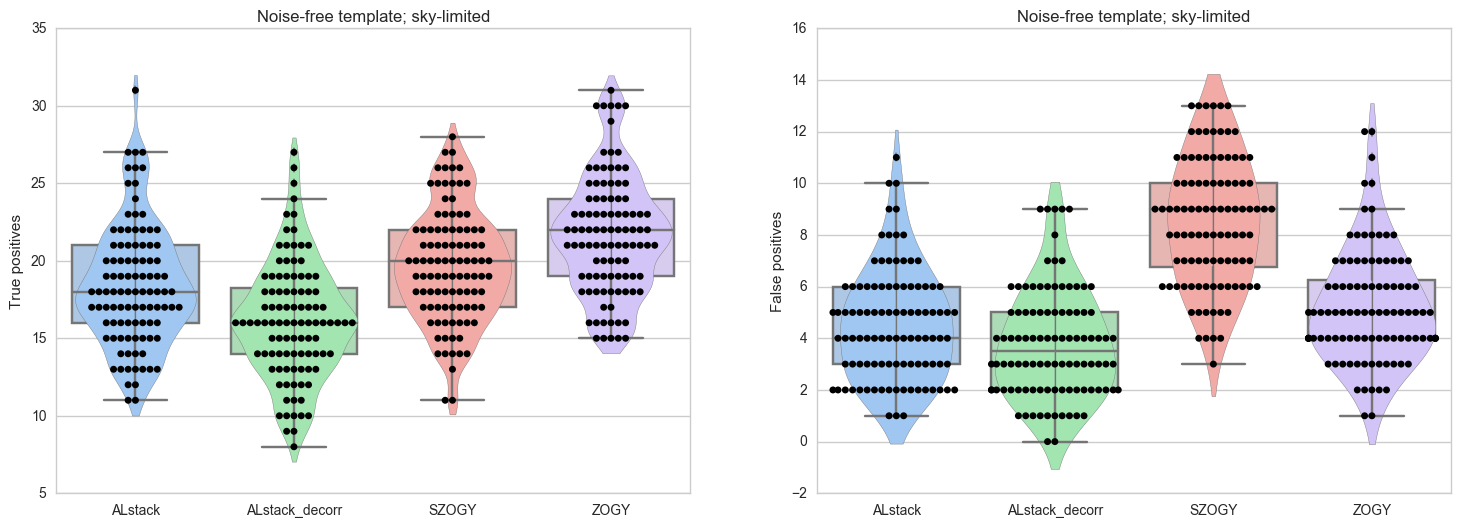

In [5]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited');

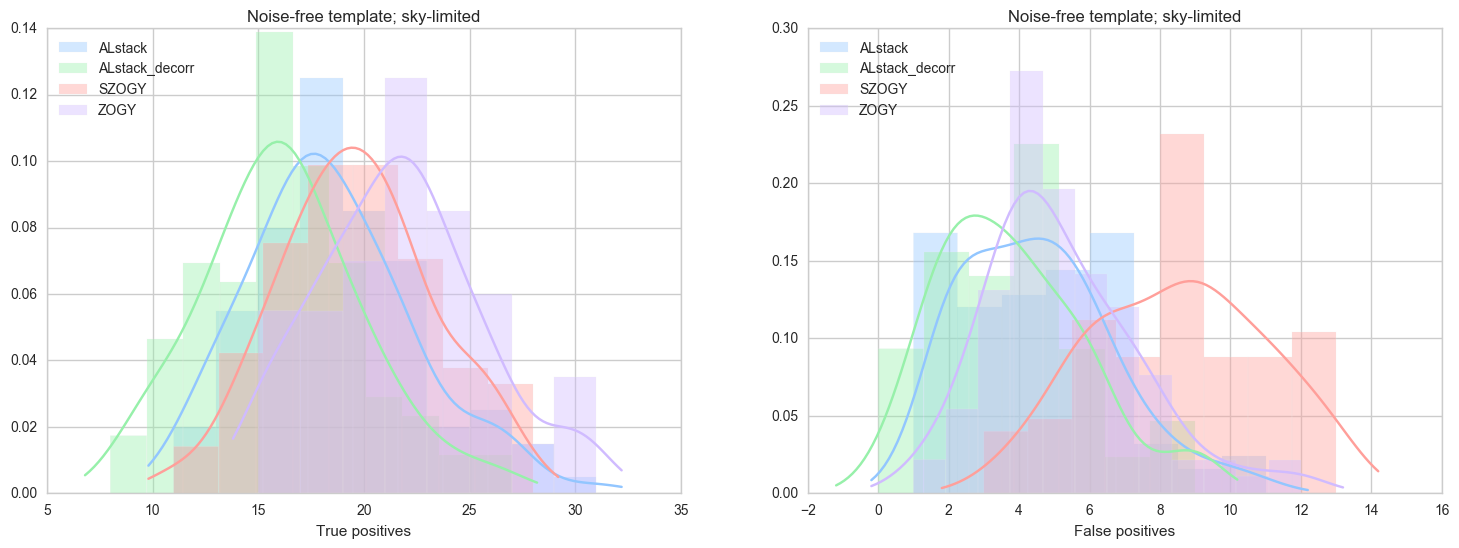

In [6]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		5.05316514091 +/- 1.01499740012
AL(decorr):	5.04472862833 +/- 1.01343620132
ZOGY:		5.02616701656 +/- 1.01187977987


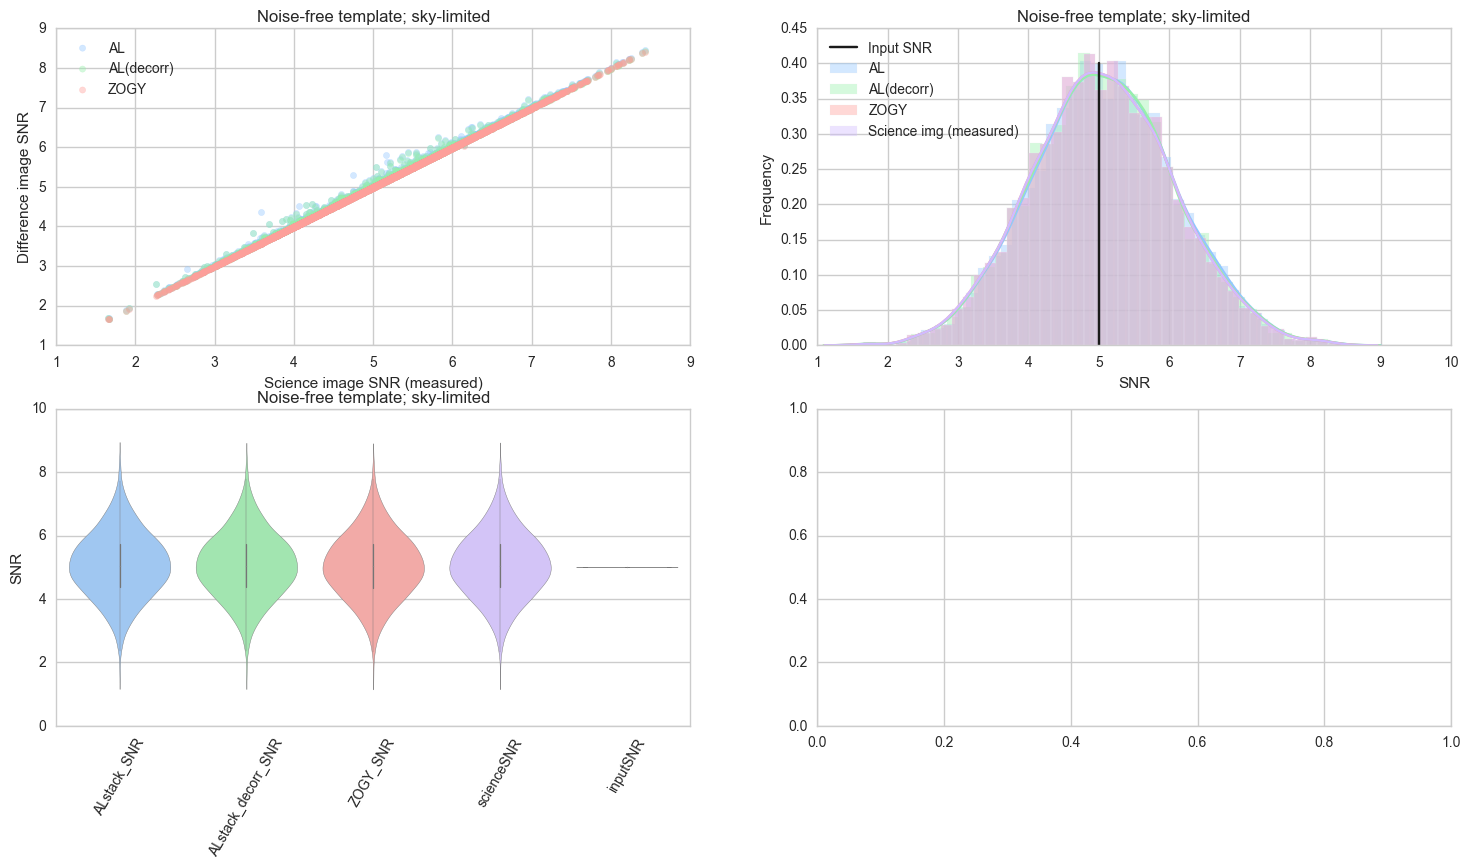

In [7]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited');

FN: 
ALstack           23.52
ALstack_decorr    26.49
SZOGY             22.73
ZOGY              21.11
dtype: float64
FP: 
ALstack           4.79
ALstack_decorr    4.64
SZOGY             8.37
ZOGY              5.33
dtype: float64
TP: 
ALstack           26.48
ALstack_decorr    23.51
SZOGY             27.27
ZOGY              28.89
dtype: float64


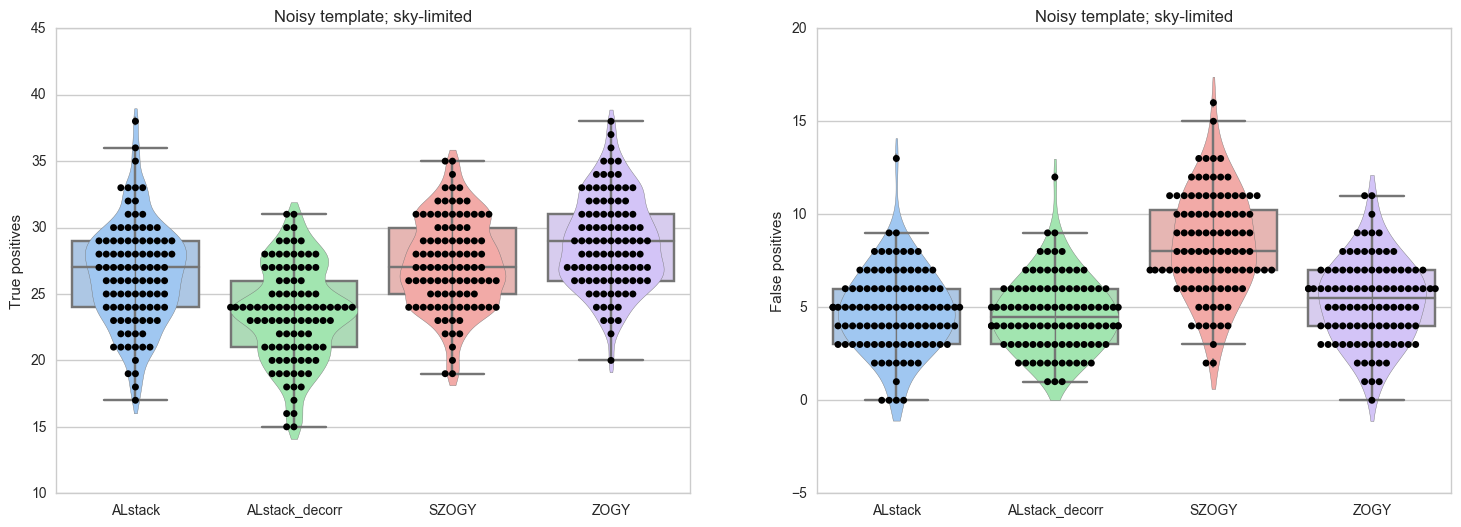

In [11]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited');

Noisy template; sky-limited :
AL:		7.00723475986 +/- 1.2892119027
AL(decorr):	5.2046274736 +/- 0.959628617163
ZOGY:		5.45713321722 +/- 1.0318625145


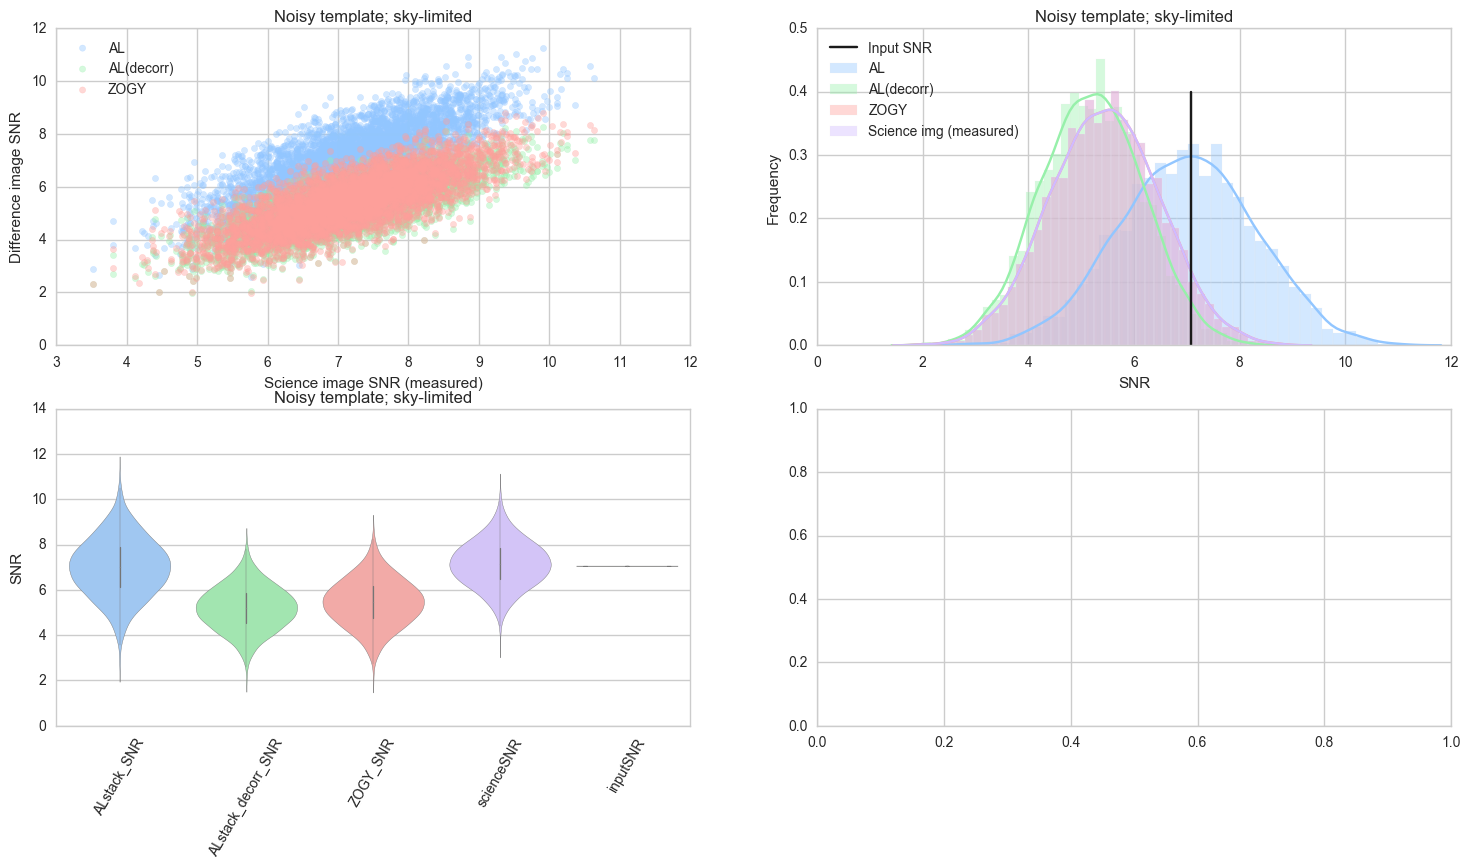

In [12]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited');

FN: 
ALstack           22.70
ALstack_decorr    25.75
SZOGY             24.54
ZOGY              21.07
dtype: float64
FP: 
ALstack           6.87
ALstack_decorr    6.73
SZOGY             8.00
ZOGY              5.30
dtype: float64
TP: 
ALstack           27.30
ALstack_decorr    24.25
SZOGY             25.46
ZOGY              28.93
dtype: float64


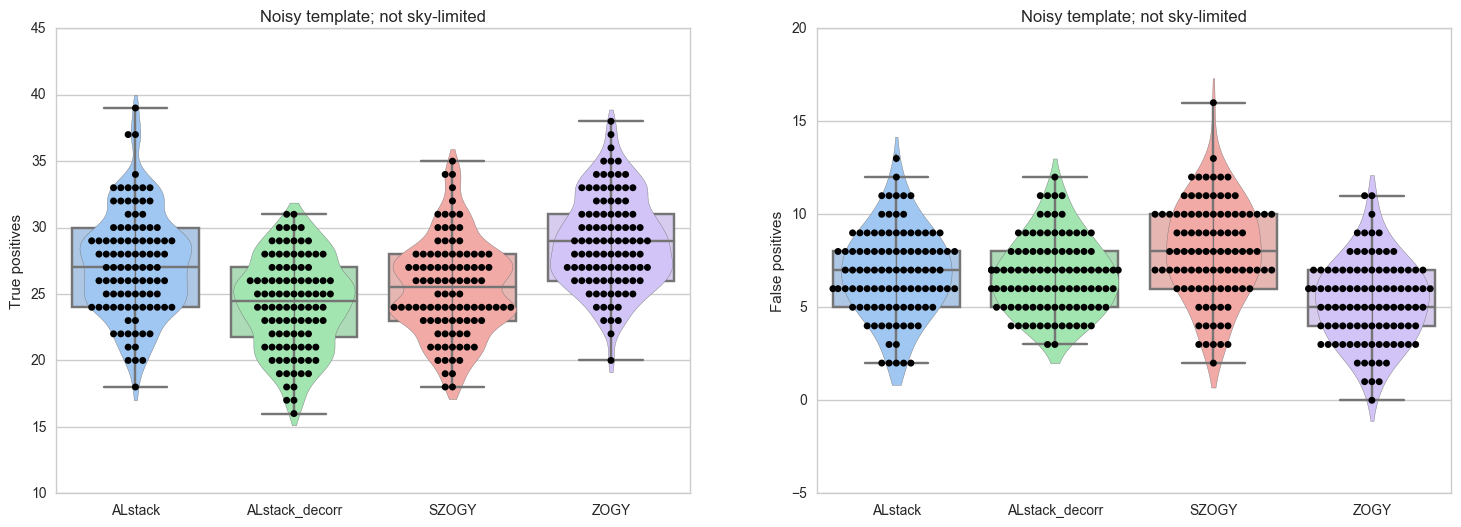

In [13]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited');

Noisy template; not sky-limited :
AL:		6.78220150695 +/- 1.22816671889
AL(decorr):	5.04474272924 +/- 0.916238272693
ZOGY:		5.34830973137 +/- 1.01070739635


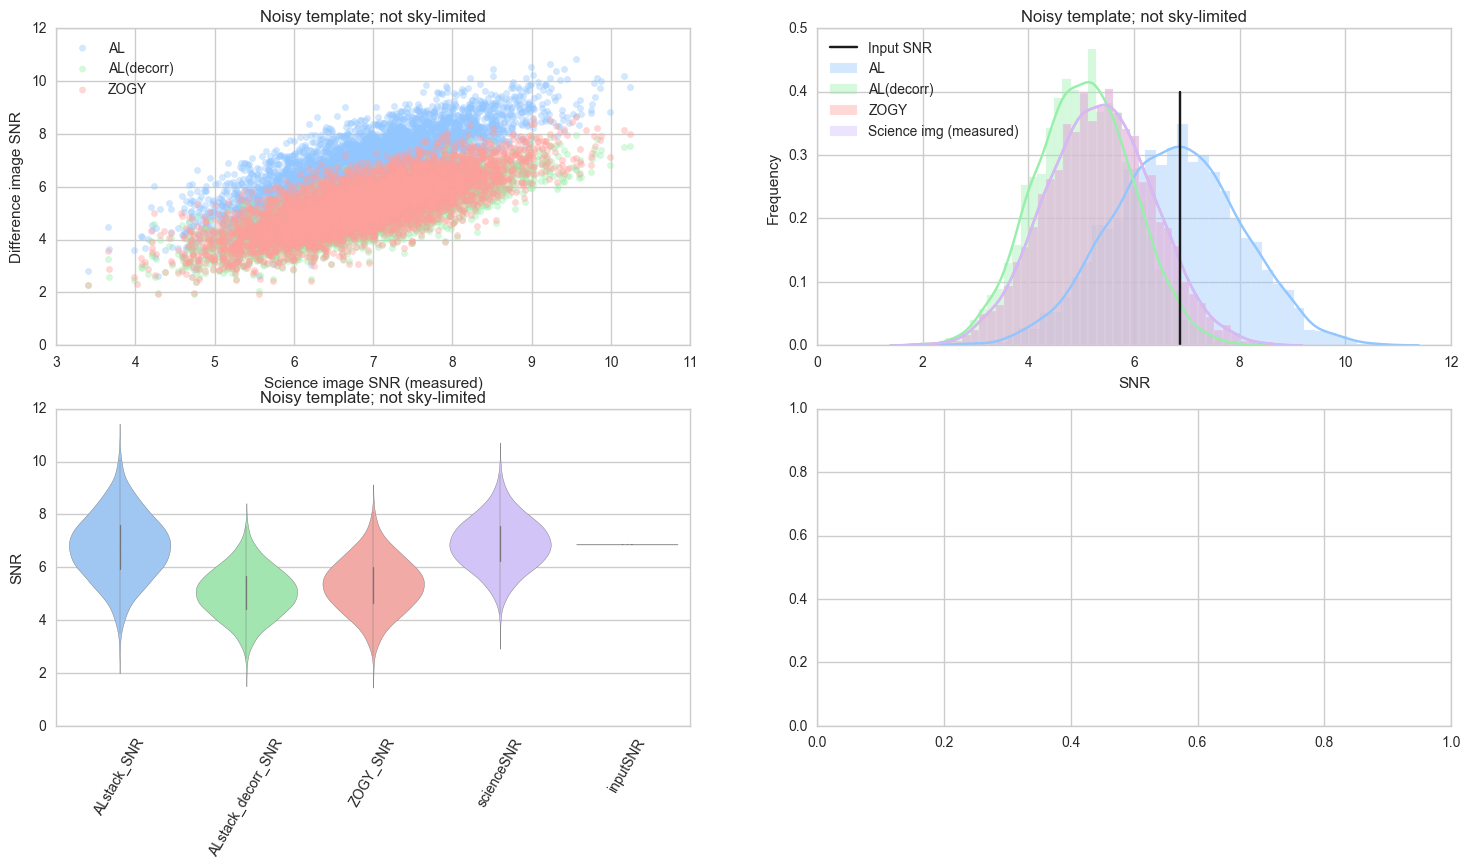

In [14]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited');

#### Figure out what is up with the runs where `ALstack` is performing poorly.

/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


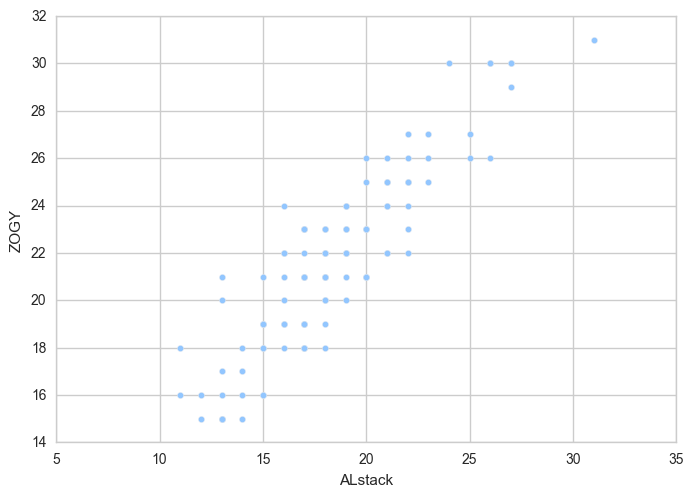

In [3]:
TP, FP, FN = dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', 
                                   actuallyPlot=False, doPrint=False)
TP.plot.scatter('ALstack', 'ZOGY')

In [4]:
print np.max(TP.ZOGY/TP.ALstack)
TP[TP.ZOGY/TP.ALstack > 1.6]

1.63636363636


,ALstack,ALstack_decorr,SZOGY,ZOGY
34,11,11,14,18
55,13,12,14,21


In [1]:
%matplotlib inline
import numpy as np
import diffimTests as dit

In [2]:
varSourceFlux = 620.
n_runs = 100
inputs = [(f, seed) for f in [varSourceFlux] for seed in np.arange(66, 66+n_runs, 1)]
i = inputs[55]
res = dit.multi.runTest(flux=i[0], seed=i[1], returnObj=True)
print {key+': '+str(res[key]) for key in ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']}
testObj = res['obj']

set(["ALstack: {'FP': 6, 'FN': 23, 'TP': 27}", "SZOGY: {'FP': 6, 'FN': 29, 'TP': 21}", "ALstack_decorr: {'FP': 5, 'FN': 24, 'TP': 26}", "ZOGY: {'FP': 5, 'FN': 27, 'TP': 23}"])


(200, 850)

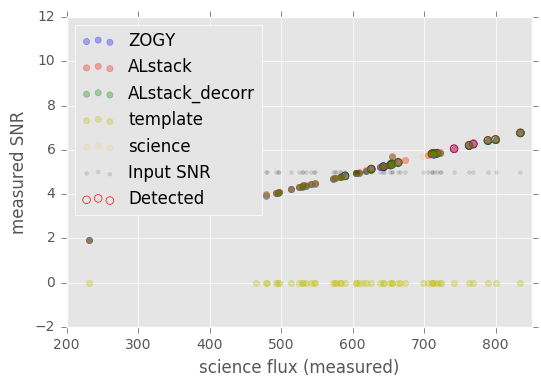

In [3]:
import matplotlib.pyplot as plt
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, addPresub=True, xaxisIsScienceForcedPhot=True,
                                        skyLimited=True, alpha=0.3);
plt.xlim(200, 850)
#plt.ylim(0., 6.);

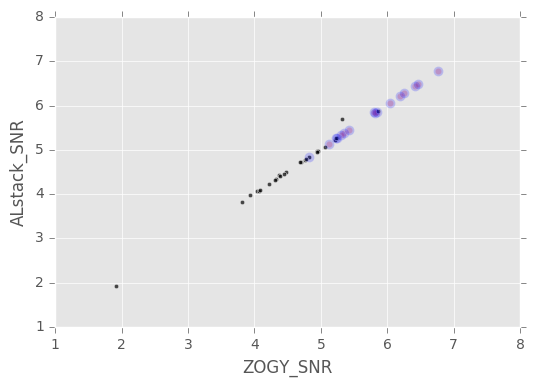

In [4]:
df = res['df']
#colors = np.repeat('k', df.shape[0])
#colors[df.ALstack_detected.values == True] = 'r'
#colors[df.ZOGY_detected.values == True] = 'g'
#colors[(df.ALstack_detected.values == True) & (df.ZOGY_detected.values == True)] = 'b'
#print colors
#print df.ALstack_detected.values
#print df.ALstack_detected.sum()
    
ax = df[df.ALstack_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='r', alpha=0.2)
df[df.ALstack_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='k', s=10, alpha=0.7, ax=ax)
df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

In [5]:
tmp = df[(df.ZOGY_detected == False) & (df.ALstack_detected == False) & (df.ZOGY_SNR > 5.5)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
20,620.0,3.560842e-08,721.679355,21,69.859494,83.859114,4.999168,5.86383,41.531102,7.082589,...,5.878595,722.30806,122.870862,False,5.859792,722.018179,123.215672,False,5.211651e-09,5.874718


A&L(dec): (1.8173926, 17.442677, -45.083225, 57.306252)
ZOGY: (0.0047047449312634737, 0.98787544797921945, -4.2749272957035505, 4.6160852826398999)
A&L(dec) - ZOGY: (-0.089609738960909541, 0.022377259626424086, -0.15350873007563326, 0.2285029255280826)


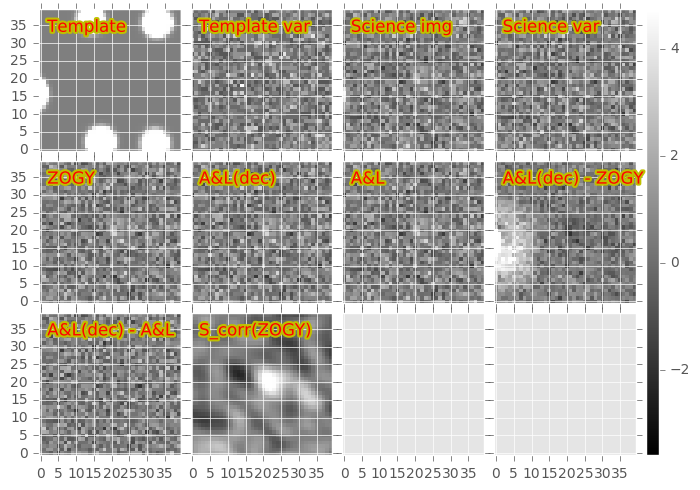

In [7]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 20], include_Szogy=True);

In [8]:
tmp = df[(df.ZOGY_detected == True) & (df.ALstack_detected == False)]
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
27,620.0,3.592500e-08,589.323465,28,75.506666,146.637439,4.999168,4.823960,33.918299,7.031215,...,4.834447,589.529294,121.943474,False,4.817940,589.162913,122.285236,True,4.907663e-09,4.833852
28,620.0,3.864608e-08,614.892433,29,481.546995,274.762382,4.999168,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,False,4.905514e-09,5.036383
33,620.0,-4.484675e-07,642.739204,34,296.255872,97.083112,4.999168,5.245129,36.990307,7.052315,...,5.269427,644.384374,122.287368,False,5.253186,644.199311,122.630205,False,-5.469395e-08,5.257108
46,620.0,-9.641331e-08,643.380972,47,295.967740,337.164674,4.999168,5.233584,37.038751,7.077129,...,5.264294,646.111548,122.734697,False,5.249327,646.084539,123.079510,False,-1.336686e-08,5.243235
49,620.0,5.040907e-12,710.348089,50,352.788591,476.721365,4.999168,NaN,NaN,NaN,...,5.791162,710.520126,122.690427,False,NaN,NaN,NaN,True,6.898319e-13,5.790919


A&L(dec): (-0.57394689, 16.386841, -49.132565, 53.107052)
ZOGY: (0.0047047449312634737, 0.98787544797921945, -4.2749272957035505, 4.6160852826398999)
A&L(dec) - ZOGY: (0.044497073238029122, 0.046593997950662734, -0.094745046518615261, 0.22695465568122764)


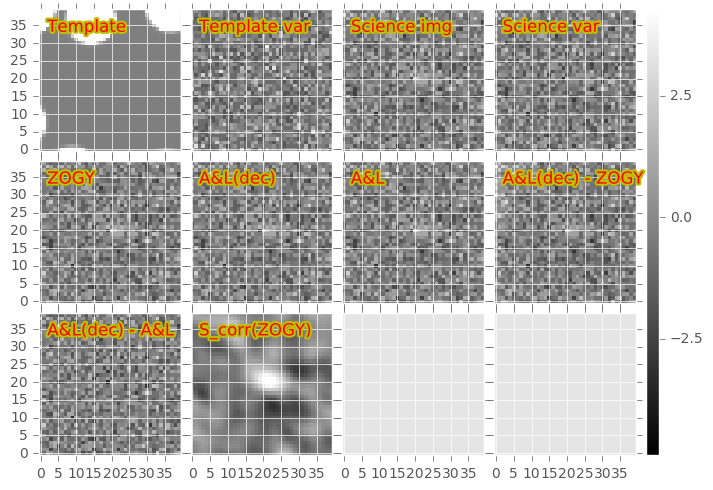

In [9]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 20], include_Szogy=True);

A&L(dec): (0.6652422, 17.304424, -56.094013, 58.181137)
ZOGY: (0.0047047449312634737, 0.98787544797921945, -4.2749272957035505, 4.6160852826398999)
A&L(dec) - ZOGY: (-0.026562102615162158, 0.010345526131743237, -0.098000091779863518, 0.33992090747730597)


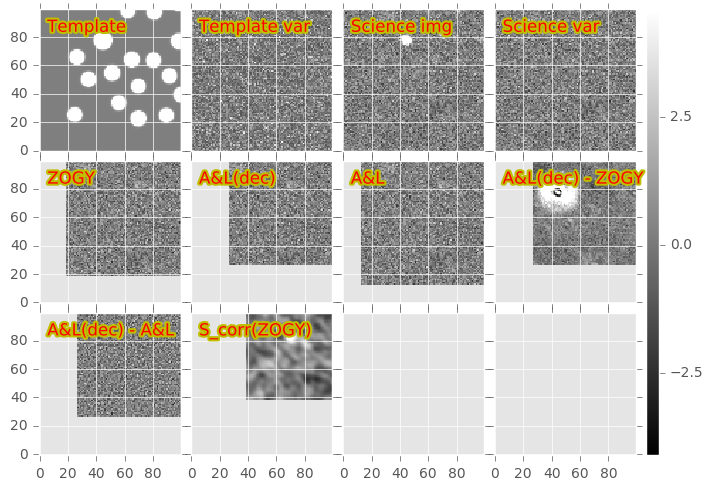

In [11]:
testObj.doPlot([51, 51, 50], include_Szogy=True);